##### Non-linear Kernel SVR

1. Importing the dataset

In [100]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

2. Importing the dataset

In [101]:
dataset = pd.read_csv("datasets/Position_Salaries.csv")
x = dataset.iloc[:, 1: -1].values
y = dataset.iloc[:, -1].values

In [102]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [103]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


- Dependent variable also need 2d array structure
    - matrix-like data sturcture expected by libreries
    -  for complex models or when consistency with multi-output cases is required

In [104]:
# y.reshape(row, column)
# y = y.reshape(len(y), 1)
y = y.reshape(-1, 1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


3. Features Scaling <br>
<br>
<small>
When use features scaling? <br>
--> scalling ensures that all features contribute equally, unsacled features with larger values may dominate <br>
--> when features have different units or ranges <br>
--> For distance-based, gradient-descent-based, or regularized models
</small>

In [105]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [106]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [107]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


4. Training the svr model on the whole dataset

In [108]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x, y)

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

5. Predicting a new result

In [109]:
# reverse scaling --> inverse transform
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(1, 1))

array([[170370.0204065]])

6. Visualising the svr results

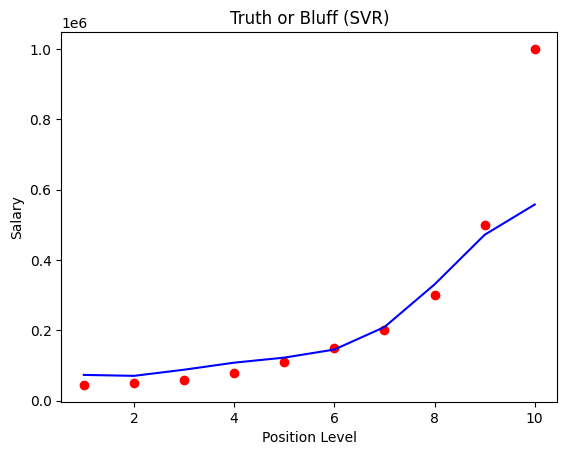

In [110]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x).reshape(-1, 1)), color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

7. Visualizing the svr results (for higher resolution and smoother curve)

C:\Users\HP\AppData\Local\Temp\ipykernel_22392\2539524152.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)


ValueError: x and y must have same first dimension, but have shapes (10, 1) and (90, 1)

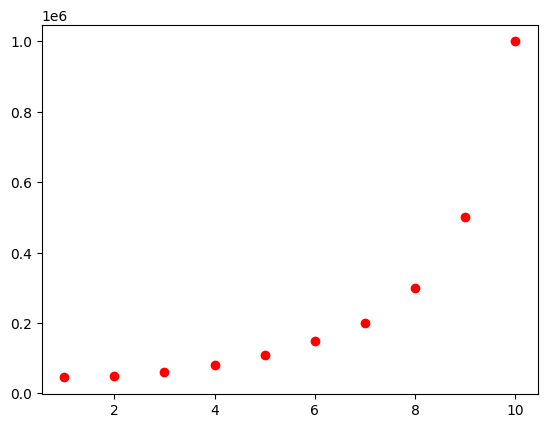

In [ ]:
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
x_grid = x_grid.reshape(-1, 1)
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid)).reshape(-1, 1)), color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()